In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror{font-family:Consolas; font-size:15pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output{font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:15pt;}
div.prompt{min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_renderulli{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))


# 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 :
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어
느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
 - https://www.mql5.com/ko/articles/11200


In [10]:
# 섭씨온도 (input data = 독립변수) 를 화씨온도 (target data = 종속변수)로 출력
def celsius_to_fahrenhite(c):
    return c * 1.8 +32

In [3]:
input_c = int(input('섭씨온도는?'))
print('화씨온도는', celsius_to_fahrenhite(input_c))

섭씨온도는?0
화씨온도는 32.0


# 딥러닝/머신러닝 프로그램 방식

- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습시키기 (훈련, 검증데이터셋)
- 6. 모델 평가 (시험데이터셋)
- 7. 모델 사용 (입력값이 주어지면 예측값을 받기)

## 노이즈가 없는 데이터 실습

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
#1. 데이터 확보(생성)
data_C = np.arange(100)
data_C #input 데이터(독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [11]:
data_F = celsius_to_fahrenhite(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [12]:
#2. 데이터 전처리 : 스케일조정 (컴퓨터에게 학습시키기 위해 정규화/표준화 : 전체의 편차를 비슷하게)
scaled_data_C = data_C/100
scaled_data_F = data_F/100

print('독립변수 : ', scaled_data_C)
print('타겟변수 :', scaled_data_F)

독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.

In [13]:
#3. 모델구성
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Input, Dense #입력값과 출력값으로 layer층 지정
model = Sequential()
model.add(Input(shape=(1,))) #입력(독립)변수의 shape
model.add(Dense(1)) #타겟(종속, 출력) 변수의 갯수
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 4. 모델 학습과정 설정
model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])

#              손실함수     옵티마이저               평가지표

In [25]:
#학습 전 예측
model.predict(np.array([[0],
                       [0.01]]))

1/1 [==============================] - 0s 13ms/step


array([[0.        ],
       [0.00065273]], dtype=float32)

In [26]:
# 학습 전 모델 저장
model.save('Model/before_learning.h5')

In [27]:
#5. 모델 학습시키기 - 셀 1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F,epochs=1000,verbose=2)
             #독립변수(훈련 data) 타겟변수(훈련data) 학습횟수 학습시 출력여부

Epoch 1/1000
4/4 - 0s - loss: 1.6276 - mae: 1.1739 - 107ms/epoch - 27ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.5983 - mae: 1.1622 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.5780 - mae: 1.1540 - 0s/epoch - 0s/step
Epoch 4/1000
4/4 - 0s - loss: 1.5615 - mae: 1.1474 - 5ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.5465 - mae: 1.1414 - 0s/epoch - 0s/step
Epoch 6/1000
4/4 - 0s - loss: 1.5307 - mae: 1.1351 - 0s/epoch - 0s/step
Epoch 7/1000
4/4 - 0s - loss: 1.5140 - mae: 1.1282 - 0s/epoch - 0s/step
Epoch 8/1000
4/4 - 0s - loss: 1.4994 - mae: 1.1222 - 7ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.4853 - mae: 1.1164 - 0s/epoch - 0s/step
Epoch 10/1000
4/4 - 0s - loss: 1.4709 - mae: 1.1104 - 7ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.4562 - mae: 1.1043 - 0s/epoch - 0s/step
Epoch 12/1000
4/4 - 0s - loss: 1.4428 - mae: 1.0987 - 7ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.4290 - mae: 1.0929 - 0s/epoch - 0s/step
Epoch 14/1000
4/4 - 0s - loss: 1.4150 - mae: 

Epoch 112/1000
4/4 - 0s - loss: 0.4107 - mae: 0.5328 - 0s/epoch - 0s/step
Epoch 113/1000
4/4 - 0s - loss: 0.4036 - mae: 0.5275 - 0s/epoch - 0s/step
Epoch 114/1000
4/4 - 0s - loss: 0.3965 - mae: 0.5224 - 7ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.3902 - mae: 0.5177 - 0s/epoch - 0s/step
Epoch 116/1000
4/4 - 0s - loss: 0.3847 - mae: 0.5136 - 7ms/epoch - 2ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.3785 - mae: 0.5091 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 0.3729 - mae: 0.5050 - 7ms/epoch - 2ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.3658 - mae: 0.4997 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 0.3596 - mae: 0.4948 - 7ms/epoch - 2ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.3534 - mae: 0.4903 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 0.3473 - mae: 0.4855 - 0s/epoch - 0s/step
Epoch 123/1000
4/4 - 0s - loss: 0.3415 - mae: 0.4810 - 0s/epoch - 0s/step
Epoch 124/1000
4/4 - 0s - loss: 0.3355 - mae: 0.4766 - 0s/epoch - 0s/step
Epoch 125/1000
4/4 - 0s - loss

Epoch 221/1000
4/4 - 0s - loss: 0.0676 - mae: 0.2251 - 0s/epoch - 0s/step
Epoch 222/1000
4/4 - 0s - loss: 0.0672 - mae: 0.2245 - 682us/epoch - 171us/step
Epoch 223/1000
4/4 - 0s - loss: 0.0669 - mae: 0.2240 - 0s/epoch - 0s/step
Epoch 224/1000
4/4 - 0s - loss: 0.0664 - mae: 0.2230 - 7ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0658 - mae: 0.2221 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.0653 - mae: 0.2211 - 0s/epoch - 0s/step
Epoch 227/1000
4/4 - 0s - loss: 0.0649 - mae: 0.2205 - 0s/epoch - 0s/step
Epoch 228/1000
4/4 - 0s - loss: 0.0645 - mae: 0.2198 - 5ms/epoch - 1ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0642 - mae: 0.2192 - 2ms/epoch - 541us/step
Epoch 230/1000
4/4 - 0s - loss: 0.0638 - mae: 0.2185 - 3ms/epoch - 648us/step
Epoch 231/1000
4/4 - 0s - loss: 0.0633 - mae: 0.2176 - 0s/epoch - 0s/step
Epoch 232/1000
4/4 - 0s - loss: 0.0629 - mae: 0.2169 - 0s/epoch - 0s/step
Epoch 233/1000
4/4 - 0s - loss: 0.0624 - mae: 0.2160 - 4ms/epoch - 1ms/step
Epoch 234/1000
4/4

Epoch 329/1000
4/4 - 0s - loss: 0.0250 - mae: 0.1363 - 1ms/epoch - 372us/step
Epoch 330/1000
4/4 - 0s - loss: 0.0247 - mae: 0.1356 - 0s/epoch - 0s/step
Epoch 331/1000
4/4 - 0s - loss: 0.0243 - mae: 0.1347 - 7ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0240 - mae: 0.1340 - 0s/epoch - 0s/step
Epoch 333/1000
4/4 - 0s - loss: 0.0237 - mae: 0.1330 - 6ms/epoch - 1ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0234 - mae: 0.1320 - 0s/epoch - 0s/step
Epoch 335/1000
4/4 - 0s - loss: 0.0232 - mae: 0.1314 - 5ms/epoch - 1ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0229 - mae: 0.1307 - 0s/epoch - 0s/step
Epoch 337/1000
4/4 - 0s - loss: 0.0226 - mae: 0.1299 - 0s/epoch - 0s/step
Epoch 338/1000
4/4 - 0s - loss: 0.0224 - mae: 0.1292 - 1ms/epoch - 252us/step
Epoch 339/1000
4/4 - 0s - loss: 0.0221 - mae: 0.1283 - 0s/epoch - 0s/step
Epoch 340/1000
4/4 - 0s - loss: 0.0217 - mae: 0.1274 - 7ms/epoch - 2ms/step
Epoch 341/1000
4/4 - 0s - loss: 0.0215 - mae: 0.1265 - 0s/epoch - 0s/step
Epoch 342/1000
4/4 - 0

Epoch 437/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0462 - 0s/epoch - 0s/step
Epoch 438/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0455 - 2ms/epoch - 412us/step
Epoch 439/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0446 - 0s/epoch - 0s/step
Epoch 440/1000
4/4 - 0s - loss: 0.0026 - mae: 0.0436 - 7ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0430 - 0s/epoch - 0s/step
Epoch 442/1000
4/4 - 0s - loss: 0.0024 - mae: 0.0423 - 7ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0415 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0409 - 6ms/epoch - 1ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0400 - 0s/epoch - 0s/step
Epoch 446/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0391 - 4ms/epoch - 998us/step
Epoch 447/1000
4/4 - 0s - loss: 0.0020 - mae: 0.0385 - 1ms/epoch - 251us/step
Epoch 448/1000
4/4 - 0s - loss: 0.0019 - mae: 0.0378 - 0s/epoch - 0s/step
Epoch 449/1000
4/4 - 0s - loss: 0.0018 - mae: 0.0371 - 5ms/epoch - 1ms/step
Epoch 450/1000
4/4

Epoch 540/1000
4/4 - 0s - loss: 2.3266e-07 - mae: 4.6752e-04 - 2ms/epoch - 480us/step
Epoch 541/1000
4/4 - 0s - loss: 9.3762e-07 - mae: 9.4598e-04 - 0s/epoch - 0s/step
Epoch 542/1000
4/4 - 0s - loss: 5.3322e-07 - mae: 7.1736e-04 - 6ms/epoch - 2ms/step
Epoch 543/1000
4/4 - 0s - loss: 2.4583e-07 - mae: 4.8462e-04 - 0s/epoch - 0s/step
Epoch 544/1000
4/4 - 0s - loss: 9.7548e-07 - mae: 9.6980e-04 - 5ms/epoch - 1ms/step
Epoch 545/1000
4/4 - 0s - loss: 4.9677e-07 - mae: 6.8856e-04 - 0s/epoch - 0s/step
Epoch 546/1000
4/4 - 0s - loss: 7.4397e-08 - mae: 2.5667e-04 - 3ms/epoch - 806us/step
Epoch 547/1000
4/4 - 0s - loss: 5.8933e-07 - mae: 7.2026e-04 - 0s/epoch - 0s/step
Epoch 548/1000
4/4 - 0s - loss: 1.5307e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 549/1000
4/4 - 0s - loss: 1.4646e-08 - mae: 1.1641e-04 - 2ms/epoch - 383us/step
Epoch 550/1000
4/4 - 0s - loss: 5.1475e-08 - mae: 2.1803e-04 - 0s/epoch - 0s/step
Epoch 551/1000
4/4 - 0s - loss: 5.4209e-07 - mae: 6.7723e-04 - 2ms/epoch - 579us/step


Epoch 639/1000
4/4 - 0s - loss: 5.0698e-07 - mae: 6.7603e-04 - 5ms/epoch - 1ms/step
Epoch 640/1000
4/4 - 0s - loss: 7.8103e-07 - mae: 8.5878e-04 - 1ms/epoch - 285us/step
Epoch 641/1000
4/4 - 0s - loss: 7.5443e-08 - mae: 2.3623e-04 - 4ms/epoch - 919us/step
Epoch 642/1000
4/4 - 0s - loss: 1.3183e-06 - mae: 0.0011 - 623us/epoch - 156us/step
Epoch 643/1000
4/4 - 0s - loss: 3.7405e-07 - mae: 6.0018e-04 - 0s/epoch - 0s/step
Epoch 644/1000
4/4 - 0s - loss: 2.6865e-07 - mae: 5.0819e-04 - 1ms/epoch - 251us/step
Epoch 645/1000
4/4 - 0s - loss: 8.7399e-07 - mae: 9.1792e-04 - 0s/epoch - 0s/step
Epoch 646/1000
4/4 - 0s - loss: 2.8644e-07 - mae: 5.1811e-04 - 6ms/epoch - 2ms/step
Epoch 647/1000
4/4 - 0s - loss: 2.9654e-07 - mae: 5.0573e-04 - 0s/epoch - 0s/step
Epoch 648/1000
4/4 - 0s - loss: 1.2695e-06 - mae: 0.0011 - 6ms/epoch - 1ms/step
Epoch 649/1000
4/4 - 0s - loss: 3.4689e-07 - mae: 5.7842e-04 - 0s/epoch - 0s/step
Epoch 650/1000
4/4 - 0s - loss: 3.1177e-07 - mae: 5.4758e-04 - 6ms/epoch - 1ms/ste

Epoch 738/1000
4/4 - 0s - loss: 6.0081e-07 - mae: 7.5445e-04 - 2ms/epoch - 423us/step
Epoch 739/1000
4/4 - 0s - loss: 5.7454e-07 - mae: 7.3946e-04 - 4ms/epoch - 953us/step
Epoch 740/1000
4/4 - 0s - loss: 5.0121e-07 - mae: 6.9300e-04 - 519us/epoch - 130us/step
Epoch 741/1000
4/4 - 0s - loss: 4.2508e-07 - mae: 6.3592e-04 - 0s/epoch - 0s/step
Epoch 742/1000
4/4 - 0s - loss: 1.2431e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 743/1000
4/4 - 0s - loss: 2.0750e-07 - mae: 4.4111e-04 - 0s/epoch - 0s/step
Epoch 744/1000
4/4 - 0s - loss: 4.2537e-07 - mae: 6.2836e-04 - 6ms/epoch - 2ms/step
Epoch 745/1000
4/4 - 0s - loss: 9.3037e-07 - mae: 9.4323e-04 - 0s/epoch - 0s/step
Epoch 746/1000
4/4 - 0s - loss: 6.7251e-07 - mae: 7.9310e-04 - 5ms/epoch - 1ms/step
Epoch 747/1000
4/4 - 0s - loss: 2.4169e-07 - mae: 4.8227e-04 - 0s/epoch - 0s/step
Epoch 748/1000
4/4 - 0s - loss: 5.9787e-07 - mae: 7.5580e-04 - 0s/epoch - 0s/step
Epoch 749/1000
4/4 - 0s - loss: 9.5684e-07 - mae: 9.5035e-04 - 2ms/epoch - 389us/s

Epoch 837/1000
4/4 - 0s - loss: 1.4461e-06 - mae: 0.0012 - 0s/epoch - 0s/step
Epoch 838/1000
4/4 - 0s - loss: 5.6736e-08 - mae: 2.2473e-04 - 7ms/epoch - 2ms/step
Epoch 839/1000
4/4 - 0s - loss: 3.0561e-07 - mae: 5.3389e-04 - 0s/epoch - 0s/step
Epoch 840/1000
4/4 - 0s - loss: 1.2532e-06 - mae: 0.0011 - 5ms/epoch - 1ms/step
Epoch 841/1000
4/4 - 0s - loss: 2.9284e-07 - mae: 5.2967e-04 - 0s/epoch - 0s/step
Epoch 842/1000
4/4 - 0s - loss: 5.9849e-07 - mae: 7.5853e-04 - 0s/epoch - 0s/step
Epoch 843/1000
4/4 - 0s - loss: 4.4419e-07 - mae: 6.4951e-04 - 1ms/epoch - 251us/step
Epoch 844/1000
4/4 - 0s - loss: 5.2385e-07 - mae: 7.0951e-04 - 0s/epoch - 0s/step
Epoch 845/1000
4/4 - 0s - loss: 8.7292e-07 - mae: 9.0871e-04 - 8ms/epoch - 2ms/step
Epoch 846/1000
4/4 - 0s - loss: 1.2478e-07 - mae: 3.4107e-04 - 2ms/epoch - 572us/step
Epoch 847/1000
4/4 - 0s - loss: 3.5180e-07 - mae: 5.5450e-04 - 4ms/epoch - 1ms/step
Epoch 848/1000
4/4 - 0s - loss: 1.1378e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 849/10

Epoch 936/1000
4/4 - 0s - loss: 1.1384e-06 - mae: 0.0010 - 2ms/epoch - 501us/step
Epoch 937/1000
4/4 - 0s - loss: 3.3423e-08 - mae: 1.7330e-04 - 0s/epoch - 0s/step
Epoch 938/1000
4/4 - 0s - loss: 5.3182e-07 - mae: 6.9541e-04 - 2ms/epoch - 501us/step
Epoch 939/1000
4/4 - 0s - loss: 1.2158e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 940/1000
4/4 - 0s - loss: 9.8055e-08 - mae: 3.0630e-04 - 7ms/epoch - 2ms/step
Epoch 941/1000
4/4 - 0s - loss: 2.9948e-07 - mae: 5.2809e-04 - 0s/epoch - 0s/step
Epoch 942/1000
4/4 - 0s - loss: 1.0085e-06 - mae: 9.7144e-04 - 5ms/epoch - 1ms/step
Epoch 943/1000
4/4 - 0s - loss: 8.3974e-07 - mae: 8.7018e-04 - 2ms/epoch - 472us/step
Epoch 944/1000
4/4 - 0s - loss: 1.1001e-07 - mae: 3.2674e-04 - 0s/epoch - 0s/step
Epoch 945/1000
4/4 - 0s - loss: 1.6653e-07 - mae: 3.8174e-04 - 1ms/epoch - 251us/step
Epoch 946/1000
4/4 - 0s - loss: 1.7247e-06 - mae: 0.0013 - 3ms/epoch - 668us/step
Epoch 947/1000
4/4 - 0s - loss: 1.2892e-07 - mae: 3.4545e-04 - 5ms/epoch - 1ms/step
Ep

In [28]:
#6 모델 과정 시각화
hist.history.keys()

dict_keys(['loss', 'mae'])

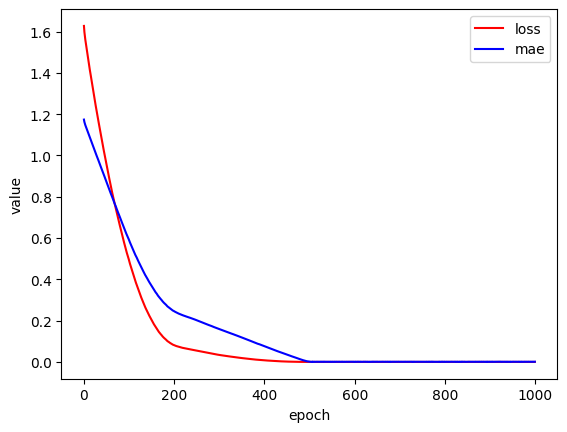

In [29]:
plt.plot(hist.history['loss'],'r',label='loss')
plt.plot(hist.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [30]:
#7. 모델 사용/저장
model.predict(np.array([[0],
                        [0.01],
                        [0.02]]))

1/1 [==============================] - 0s 11ms/step


array([[0.31956673],
       [0.33756244],
       [0.35555816]], dtype=float32)

In [31]:
model.save('Model/after_learning.h5')

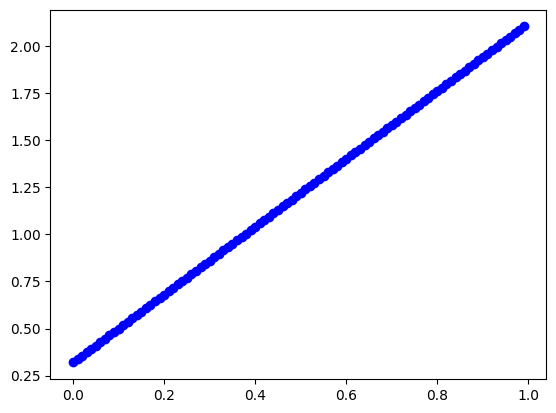

In [32]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')

In [33]:
y_hat = model.predict([scaled_data_C])
for h, y in zip (y_hat,scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 529us/step
[0.31956673] 0.32
[0.33756244] 0.68
[0.35555816] 1.04
[0.37355384] 1.4
[0.39154956] 1.76


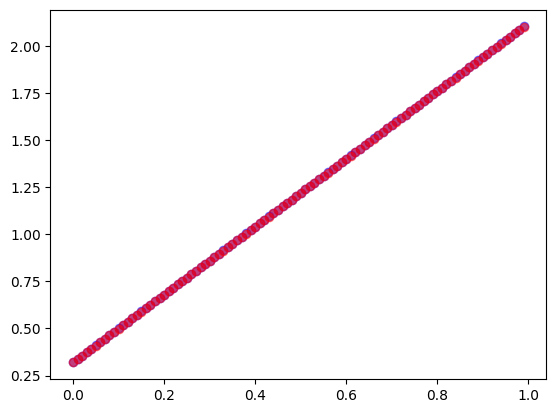

In [34]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b',alpha=.5)
plt.scatter(x=scaled_data_C, y=y_hat, c='r',alpha=.5)

## 노이즈가 있는 데이터로 실습

In [35]:
scaled_data_C

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [36]:
#noise : 평균 0, 표준편차 0.1인 데이터 100개 배열
np.random.seed(707)
noise = np.random.normal(0,scale=0.1, size=100)
noised_scaled_data_F = scaled_data_F + noise
noised_scaled_data_F
print('독립변수: ',scaled_data_C)
print('타겟변수: ', noised_scaled_data_F)

독립변수:  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수:  [0.27500034 0.20410134 0.39498826 0.27117424 0.26897164 0.35314388
 0.4496784  0.42612159 0.49409646 0.45740286 0.31574183 0.67996337
 0.46117139 0.66152189 0.45319086 0.4519712  0.73018132 0.54170904
 0.68386841 0.75022628 0.65735179 0.76512782 0.57019861 0.79130977
 0.62965251 0.60058611 0.81087191 0.79345666 0.90825121 0.80020546
 0.8489619  0.72808603 0.98336163 0.78173322 0.8212351  1.05542797
 0.86566002 0.99728791 1.14628604 0.93021808 0.91091956 1.20887357
 0.89807

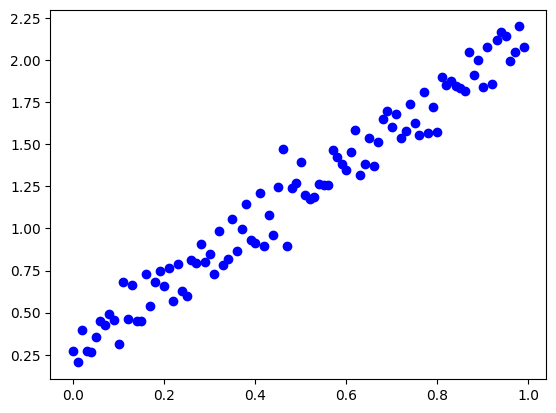

In [37]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F,c='b')

In [56]:
#3 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
#model2.add(Input(shape=(1,))) #입력(독립)변수의 shape
#model2.add(Dense(1)) # 타겟(종속,출력) 변수의 갯수
print(model2.summary())

# 5. 학습과정 설정
model2.compile(loss = 'mse', optimizer='rmsprop', metrics=['mae'])

# 6. 학습시키기
model2.fit(scaled_data_C, noised_scaled_data_F, epochs=5000,verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5000
4/4 - 0s - loss: 0.4578 - mae: 0.6353 - 94ms/epoch - 24ms/step
Epoch 2/5000
4/4 - 0s - loss: 0.4420 - mae: 0.6233 - 11ms/epoch - 3ms/step
Epoch 3/5000
4/4 - 0s - loss: 0.4322 - mae: 0.6158 - 2ms/epoch - 443us/step
Epoch 4/5000
4/4 - 0s - loss: 0.4227 - mae: 0.6085 - 1ms/epoch - 332us/step
Epoch 5/5000
4/4 - 0s - loss: 0.4143 - mae: 0.6020 - 0s/epoch - 0s/step
Epoch 6/5000
4/4 - 0s - loss: 0.4064 - mae: 0.5958 - 6ms/epoch - 2ms/step
Epoch 7/5000
4/4 - 0s - loss: 0.3981 - mae: 0.5892 - 0s/epoch - 0s/step
Epoch 8/5000
4/4 - 0s - loss: 0.3909 - mae: 0.5835 - 5ms/epoch

Epoch 102/5000
4/4 - 0s - loss: 0.0249 - mae: 0.1293 - 2ms/epoch - 500us/step
Epoch 103/5000
4/4 - 0s - loss: 0.0240 - mae: 0.1271 - 2ms/epoch - 501us/step
Epoch 104/5000
4/4 - 0s - loss: 0.0232 - mae: 0.1251 - 2ms/epoch - 598us/step
Epoch 105/5000
4/4 - 0s - loss: 0.0227 - mae: 0.1239 - 1ms/epoch - 270us/step
Epoch 106/5000
4/4 - 0s - loss: 0.0222 - mae: 0.1227 - 2ms/epoch - 411us/step
Epoch 107/5000
4/4 - 0s - loss: 0.0215 - mae: 0.1210 - 0s/epoch - 0s/step
Epoch 108/5000
4/4 - 0s - loss: 0.0211 - mae: 0.1197 - 6ms/epoch - 1ms/step
Epoch 109/5000
4/4 - 0s - loss: 0.0206 - mae: 0.1185 - 0s/epoch - 0s/step
Epoch 110/5000
4/4 - 0s - loss: 0.0200 - mae: 0.1170 - 0s/epoch - 0s/step
Epoch 111/5000
4/4 - 0s - loss: 0.0198 - mae: 0.1163 - 1ms/epoch - 261us/step
Epoch 112/5000
4/4 - 0s - loss: 0.0197 - mae: 0.1159 - 0s/epoch - 0s/step
Epoch 113/5000
4/4 - 0s - loss: 0.0194 - mae: 0.1153 - 6ms/epoch - 1ms/step
Epoch 114/5000
4/4 - 0s - loss: 0.0192 - mae: 0.1146 - 0s/epoch - 0s/step
Epoch 115/

4/4 - 0s - loss: 0.0120 - mae: 0.0914 - 0s/epoch - 0s/step
Epoch 210/5000
4/4 - 0s - loss: 0.0120 - mae: 0.0914 - 6ms/epoch - 2ms/step
Epoch 211/5000
4/4 - 0s - loss: 0.0120 - mae: 0.0912 - 0s/epoch - 0s/step
Epoch 212/5000
4/4 - 0s - loss: 0.0120 - mae: 0.0913 - 5ms/epoch - 1ms/step
Epoch 213/5000
4/4 - 0s - loss: 0.0119 - mae: 0.0911 - 2ms/epoch - 385us/step
Epoch 214/5000
4/4 - 0s - loss: 0.0119 - mae: 0.0911 - 0s/epoch - 0s/step
Epoch 215/5000
4/4 - 0s - loss: 0.0119 - mae: 0.0911 - 6ms/epoch - 2ms/step
Epoch 216/5000
4/4 - 0s - loss: 0.0118 - mae: 0.0909 - 2ms/epoch - 516us/step
Epoch 217/5000
4/4 - 0s - loss: 0.0118 - mae: 0.0908 - 2ms/epoch - 500us/step
Epoch 218/5000
4/4 - 0s - loss: 0.0118 - mae: 0.0908 - 2ms/epoch - 500us/step
Epoch 219/5000
4/4 - 0s - loss: 0.0118 - mae: 0.0909 - 2ms/epoch - 500us/step
Epoch 220/5000
4/4 - 0s - loss: 0.0118 - mae: 0.0908 - 2ms/epoch - 501us/step
Epoch 221/5000
4/4 - 0s - loss: 0.0117 - mae: 0.0907 - 2ms/epoch - 500us/step
Epoch 222/5000
4/4 

Epoch 316/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 317/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 318/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 319/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 320/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 251us/step
Epoch 321/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 322/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 2ms/step
Epoch 323/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 735us/epoch - 184us/step
Epoch 324/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 325/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 370us/step
Epoch 326/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 286us/step
Epoch 327/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 328/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 537us/step
Epoch 329/

Epoch 424/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 749us/step
Epoch 425/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 3ms/epoch - 750us/step
Epoch 426/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 501us/step
Epoch 427/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 2ms/epoch - 461us/step
Epoch 428/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 429/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 430/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 1ms/epoch - 251us/step
Epoch 431/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 3ms/epoch - 745us/step
Epoch 432/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 433/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 377us/step
Epoch 434/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 435/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 436/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 251us/step
Epoc

Epoch 532/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 5ms/epoch - 1ms/step
Epoch 533/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 735us/epoch - 184us/step
Epoch 534/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 535/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 1ms/step
Epoch 536/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 537/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 538/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 251us/step
Epoch 539/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 540/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoch 541/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 542/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 543/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 544/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 545/5000
4/4 -

Epoch 639/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 698us/epoch - 175us/step
Epoch 640/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 380us/step
Epoch 641/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 539us/step
Epoch 642/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 295us/step
Epoch 643/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 759us/step
Epoch 644/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 645/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 827us/step
Epoch 646/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 647/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 648/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 649/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 650/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 838us/step
Epoch 651/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 909us/step


4/4 - 0s - loss: 0.0111 - mae: 0.0883 - 0s/epoch - 0s/step
Epoch 747/5000
4/4 - 0s - loss: 0.0111 - mae: 0.0883 - 5ms/epoch - 1ms/step
Epoch 748/5000
4/4 - 0s - loss: 0.0111 - mae: 0.0883 - 2ms/epoch - 500us/step
Epoch 749/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 0s/epoch - 0s/step
Epoch 750/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 5ms/epoch - 1ms/step
Epoch 751/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 2ms/epoch - 500us/step
Epoch 752/5000
4/4 - 0s - loss: 0.0111 - mae: 0.0883 - 2ms/epoch - 499us/step
Epoch 753/5000
4/4 - 0s - loss: 0.0111 - mae: 0.0884 - 2ms/epoch - 500us/step
Epoch 754/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 2ms/epoch - 501us/step
Epoch 755/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 2ms/epoch - 459us/step
Epoch 756/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 2ms/epoch - 500us/step
Epoch 757/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 758/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 759/5000
4/4 

Epoch 853/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 250us/step
Epoch 854/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 855/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 541us/step
Epoch 856/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 996us/epoch - 249us/step
Epoch 857/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 933us/step
Epoch 858/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 534us/step
Epoch 859/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 860/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 962us/step
Epoch 861/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 1000us/epoch - 250us/step
Epoch 862/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 863/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 864/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 865/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step

4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 953us/step
Epoch 960/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 961/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 1ms/epoch - 278us/step
Epoch 962/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 728us/step
Epoch 963/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 342us/step
Epoch 964/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 845us/step
Epoch 965/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 966/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 967/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 968/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 340us/step
Epoch 969/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 970/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 527us/step
Epoch 971/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 972/5000


Epoch 1065/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 527us/step
Epoch 1066/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 1067/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 1068/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 499us/step
Epoch 1069/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 1070/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 527us/step
Epoch 1071/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 250us/step
Epoch 1072/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 4ms/epoch - 925us/step
Epoch 1073/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1074/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 477us/step
Epoch 1075/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 261us/step
Epoch 1076/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 3ms/epoch - 626us/step
Epoch 1077/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/ep

Epoch 1170/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 500us/step
Epoch 1171/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1172/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 2ms/epoch - 500us/step
Epoch 1173/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 999us/epoch - 250us/step
Epoch 1174/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1175/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1176/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 515us/step
Epoch 1177/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1178/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1179/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 250us/step
Epoch 1180/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 1181/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1182/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0

4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1276/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1277/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1278/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 7ms/epoch - 2ms/step
Epoch 1279/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 1280/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 1281/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 502us/step
Epoch 1282/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 1283/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 500us/step
Epoch 1284/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1285/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1286/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 500us/step
Epoch 1287/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 1288/

4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1382/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 751us/step
Epoch 1383/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1384/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 1385/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 998us/epoch - 250us/step
Epoch 1386/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1387/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 2ms/epoch - 501us/step
Epoch 1388/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 1389/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 993us/step
Epoch 1390/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1391/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1392/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 502us/step
Epoch 1393/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 1394/50

Epoch 1487/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 1488/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 2ms/epoch - 502us/step
Epoch 1489/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1000us/epoch - 250us/step
Epoch 1490/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 990us/step
Epoch 1491/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 502us/step
Epoch 1492/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 1493/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 1494/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1495/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1496/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 1497/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 250us/step
Epoch 1498/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 984us/step
Epoch 1499/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch

Epoch 1593/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1594/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 1595/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1596/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1597/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 1598/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1599/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 1600/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1601/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 668us/step
Epoch 1602/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 985us/step
Epoch 1603/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1604/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1605/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 1606/

Epoch 1700/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 3ms/epoch - 630us/step
Epoch 1701/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 0s/epoch - 0s/step
Epoch 1702/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 4ms/epoch - 1ms/step
Epoch 1703/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 1704/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 0s/epoch - 0s/step
Epoch 1705/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 395us/step
Epoch 1706/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1707/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 1708/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1709/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1710/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 1711/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 1712/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 1713/

Epoch 1807/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1808/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1809/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 7ms/epoch - 2ms/step
Epoch 1810/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 527us/step
Epoch 1811/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 1812/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 750us/step
Epoch 1813/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 1814/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 501us/step
Epoch 1815/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 518us/step
Epoch 1816/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 250us/step
Epoch 1817/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 501us/step
Epoch 1818/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 1ms/epoch - 250us/step
Epoch 1819/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/ep

Epoch 1912/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 502us/step
Epoch 1913/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 1914/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 1915/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 499us/step
Epoch 1916/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 1ms/epoch - 338us/step
Epoch 1917/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 1918/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 250us/step
Epoch 1919/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 992us/step
Epoch 1920/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 391us/step
Epoch 1921/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 1922/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 1923/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 1924/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch

Epoch 2017/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 538us/step
Epoch 2018/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 749us/step
Epoch 2019/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 500us/step
Epoch 2020/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 2021/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 2022/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 509us/step
Epoch 2023/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2024/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 985us/step
Epoch 2025/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 2ms/epoch - 500us/step
Epoch 2026/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2027/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 2028/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 1ms/epoch - 250us/step
Epoch 2029/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/ep

Epoch 2122/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 999us/epoch - 250us/step
Epoch 2123/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 989us/step
Epoch 2124/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 2125/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2126/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 502us/step
Epoch 2127/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 798us/epoch - 200us/step
Epoch 2128/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 796us/step
Epoch 2129/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 550us/step
Epoch 2130/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2131/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 2132/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 251us/step
Epoch 2133/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2134/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/ep

Epoch 2227/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 2228/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 965us/step
Epoch 2229/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 514us/step
Epoch 2230/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2231/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 995us/step
Epoch 2232/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2233/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2234/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 2235/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 250us/step
Epoch 2236/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 974us/step
Epoch 2237/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 502us/step
Epoch 2238/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2239/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch 

Epoch 2332/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2333/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2334/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2335/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2336/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2337/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2338/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2339/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2340/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 2341/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 2342/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2343/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 250us/step
Epoch 2344/5000
4/4 - 0s - loss: 0.0110 - mae: 0.087

Epoch 2439/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 6ms/epoch - 1ms/step
Epoch 2440/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2441/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2442/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2443/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 803us/step
Epoch 2444/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 848us/step
Epoch 2445/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2446/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2447/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 9ms/epoch - 2ms/step
Epoch 2448/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 417us/step
Epoch 2449/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 2ms/epoch - 572us/step
Epoch 2450/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 2451/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch

Epoch 2545/5000
4/4 - 0s - loss: 0.0111 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2546/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 2547/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 250us/step
Epoch 2548/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 2549/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 751us/step
Epoch 2550/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2551/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 2552/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 251us/step
Epoch 2553/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 979us/step
Epoch 2554/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 502us/step
Epoch 2555/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2556/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 2557/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 25

Epoch 2651/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 999us/epoch - 250us/step
Epoch 2652/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2653/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 2654/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 355us/step
Epoch 2655/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 872us/step
Epoch 2656/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 751us/step
Epoch 2657/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2658/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 2659/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 2ms/epoch - 502us/step
Epoch 2660/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2661/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2662/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 1ms/epoch - 250us/step
Epoch 2663/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/

Epoch 2757/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 7ms/epoch - 2ms/step
Epoch 2758/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 2759/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 2760/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 2761/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2762/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2763/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2764/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2765/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 2766/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2767/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2768/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 2769/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2770/5000
4

Epoch 2865/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2866/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 2867/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 2868/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 2869/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2870/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2871/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 2872/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2873/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 2874/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 2875/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 2ms/epoch - 500us/step
Epoch 2876/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 251us/step
Epoch 2877/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step

Epoch 2973/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 2974/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2975/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 2976/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 2977/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2978/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2979/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 2980/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 2981/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 2982/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2983/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 2984/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 2985/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 0s/epoch - 0s/step
Epoch 2986/5000
4

Epoch 3080/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3081/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3082/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3083/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3084/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 1ms/epoch - 251us/step
Epoch 3085/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3086/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 6ms/epoch - 2ms/step
Epoch 3087/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3088/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3089/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 3090/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3091/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 3092/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step

Epoch 3187/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 3188/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3189/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3190/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 7ms/epoch - 2ms/step
Epoch 3191/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3192/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3193/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 3194/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 380us/step
Epoch 3195/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 380us/step
Epoch 3196/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 759us/step
Epoch 3197/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 3198/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 3199/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step

4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3295/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 3296/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 603us/step
Epoch 3297/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3298/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 3299/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3300/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3301/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3302/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3303/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 7ms/epoch - 2ms/step
Epoch 3304/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3305/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3306/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 7ms/epoch - 2ms/step
Epoch 3307/5000
4/4 - 0s - lo

Epoch 3402/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 2ms/epoch - 500us/step
Epoch 3403/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 702us/step
Epoch 3404/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 864us/epoch - 216us/step
Epoch 3405/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3406/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 414us/step
Epoch 3407/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3408/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3409/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 3410/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3411/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 3412/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3413/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3414/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
E

Epoch 3508/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 3509/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3510/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3511/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 3512/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3513/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3514/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3515/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3516/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 3517/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 594us/step
Epoch 3518/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 3519/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3520/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3521/50

Epoch 3616/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3617/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3618/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3619/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3620/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 7ms/epoch - 2ms/step
Epoch 3621/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3622/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3623/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 3624/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 3625/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3626/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 888us/step
Epoch 3627/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3628/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3629/5000
4

4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3724/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3725/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3726/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 3727/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3728/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 3729/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 3730/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3731/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 3732/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3733/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3734/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 517us/step
Epoch 3735/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 385us/step
Epoch 3736/50

4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3831/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoch 3832/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3833/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3834/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 3835/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3836/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3837/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3838/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3839/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 3840/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 2ms/epoch - 501us/step
Epoch 3841/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3842/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3843/5000
4/4 - 0s 

4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 3938/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 3939/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 3940/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1000us/epoch - 250us/step
Epoch 3941/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 3942/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 305us/epoch - 76us/step
Epoch 3943/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3944/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3945/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3946/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 3947/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 3948/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 456us/step
Epoch 3949/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 3950/

Epoch 4044/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4045/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4046/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 4047/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 669us/step
Epoch 4048/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 673us/step
Epoch 4049/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 827us/step
Epoch 4050/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4051/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4052/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 7ms/epoch - 2ms/step
Epoch 4053/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4054/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4055/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 4056/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 2ms/epoch - 501us/step

Epoch 4151/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4152/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4153/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4154/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4155/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 4156/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4157/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4158/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4159/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4160/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 7ms/epoch - 2ms/step
Epoch 4161/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4162/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4163/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4164/5000
4

Epoch 4258/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4259/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4260/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 4261/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4262/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4263/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4264/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4265/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4266/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4267/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4268/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 8ms/epoch - 2ms/step
Epoch 4269/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 4270/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 4271/

Epoch 4366/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4367/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4368/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4369/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 4370/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4371/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 4372/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4373/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 8ms/epoch - 2ms/step
Epoch 4374/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4375/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4376/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4377/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4378/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4379/5000
4

Epoch 4472/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4473/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 4474/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 499us/step
Epoch 4475/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 4476/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1000us/epoch - 250us/step
Epoch 4477/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 4478/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 4479/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1000us/epoch - 250us/step
Epoch 4480/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4481/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 4482/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4483/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4484/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch 

Epoch 4579/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4580/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 4581/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 863us/step
Epoch 4582/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 889us/step
Epoch 4583/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 0s/epoch - 0s/step
Epoch 4584/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0882 - 0s/epoch - 0s/step
Epoch 4585/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 798us/epoch - 199us/step
Epoch 4586/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4587/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 2ms/step
Epoch 4588/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4589/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4590/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 311us/step
Epoch 4591/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
E

4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 4687/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4688/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4689/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 7ms/epoch - 2ms/step
Epoch 4690/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4691/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 1ms/step
Epoch 4692/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4693/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 1ms/epoch - 320us/step
Epoch 4694/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 851us/step
Epoch 4695/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4696/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4697/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 4698/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 4699/5000
4/4 - 0s 

Epoch 4794/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1000us/epoch - 250us/step
Epoch 4795/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 2ms/epoch - 501us/step
Epoch 4796/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 500us/step
Epoch 4797/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 2ms/epoch - 500us/step
Epoch 4798/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 523us/step
Epoch 4799/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 1ms/epoch - 250us/step
Epoch 4800/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 4801/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 1ms/epoch - 252us/step
Epoch 4802/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 749us/step
Epoch 4803/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 501us/step
Epoch 4804/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4805/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4806/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7

Epoch 4902/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 4903/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 874us/step
Epoch 4904/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4905/5000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4906/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 0s/epoch - 0s/step
Epoch 4907/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4908/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4909/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4910/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 4911/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 2ms/epoch - 625us/step
Epoch 4912/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4913/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 4914/5000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 4915/50

In [57]:
# 6. 학습과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'mae'])

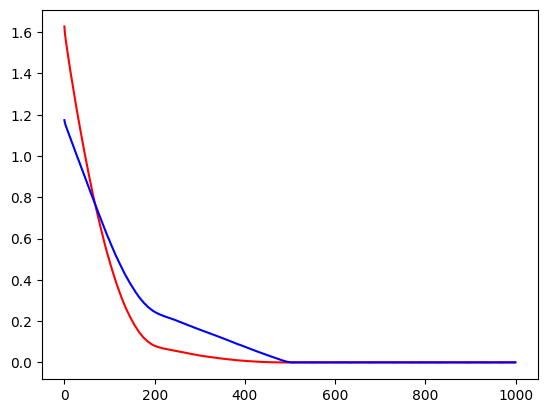

In [58]:
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['mae'],'b')

In [59]:
#7. 모델 사용하기
model2.predict(np.array([[-0.01],
                         [0],
                         [0.02]]))

1/1 [==============================] - 0s 21ms/step


array([[0.2590736 ],
       [0.2777696 ],
       [0.31516165]], dtype=float32)

In [60]:
y_hat = model2.predict([scaled_data_C])
for h, y in zip(y_hat, noised_scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 668us/step
[0.2777696] 0.2750003435726217
[0.2964656] 0.6573517921634632
[0.31516165] 0.9109195630083544
[0.33385766] 1.3455450551349164
[0.35255367] 1.5738145874658984


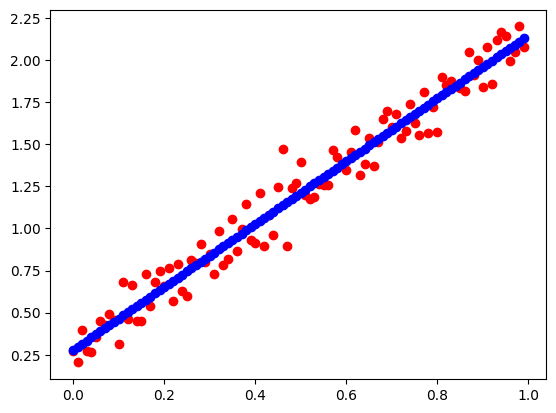

In [61]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='r')
plt.scatter(x=scaled_data_C, y=y_hat, c='b')

In [66]:
#모델저장
model2.save('Model/noised_after_learning.h5')

# from tensorflow.keras.models import save_model
# save_model(model2, 'Model/noised_after_learning1.h5')
# save_model(model2, 'Model/noised_after_learning1.keras')

In [68]:
#저장된 모델 사용하기
from tensorflow.keras.models import load_model
model3 = load_model('Model/noised_after_learning.h5')

In [70]:
model3.predict(np.array([[-0.01],
                        [0],
                        [0.01]]))

1/1 [==============================] - 0s 17ms/step


array([[0.2590736],
       [0.2777696],
       [0.2964656]], dtype=float32)